In [4]:
!pip install sklearn datashader plotly folium

In [20]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Récupération des données sources sur data.gouv.nc
Il n'y a pas de données avant 2019 pour la Nouvelle Calédonie

In [6]:
%%bash
mkdir data
# caracteristiques-2020.csv
wget https://www.data.gouv.fr/fr/datasets/r/07a88205-83c1-4123-a993-cba5331e8ae0 -O data/caracteristiques-2020.csv
# 2019
wget https://www.data.gouv.fr/fr/datasets/r/e22ba475-45a3-46ac-a0f7-9ca9ed1e283a -O data/caracteristiques-2019.csv
# usagers-2020.csv
wget https://www.data.gouv.fr/fr/datasets/r/78c45763-d170-4d51-a881-e3147802d7ee -O data/usagers-2020.csv
# 2019
wget https://www.data.gouv.fr/fr/datasets/r/36b1b7b3-84b4-4901-9163-59ae8a9e3028 -O data/usagers-2019.csv

mkdir: impossible de créer le répertoire «data»: Le fichier existe
--2022-01-30 16:38:26--  https://www.data.gouv.fr/fr/datasets/r/07a88205-83c1-4123-a993-cba5331e8ae0
Résolution de www.data.gouv.fr (www.data.gouv.fr)... 37.59.183.93
Connexion vers www.data.gouv.fr (www.data.gouv.fr)|37.59.183.93|:443... connecté.
requête HTTP transmise, en attente de la réponse... 302 FOUND
Emplacement: https://static.data.gouv.fr/resources/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2019/20211110-111202/caracteristiques-2020.csv [suivant]
--2022-01-30 16:38:28--  https://static.data.gouv.fr/resources/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2019/20211110-111202/caracteristiques-2020.csv
Résolution de static.data.gouv.fr (static.data.gouv.fr)... 37.59.183.93
Connexion vers static.data.gouv.fr (static.data.gouv.fr)|37.59.183.93|:443... connecté.
requête HTTP transmise, en attente de la réponse... 20

In [3]:
caracteristiques = pd.read_csv('data/caracteristiques-2020.csv', delimiter=';')
caracteristiques =  pd.concat([caracteristiques, pd.read_csv('data/caracteristiques-2019.csv', delimiter=';')])
caracteristiques = caracteristiques.applymap(lambda x: x.strip().replace(',', '.') if isinstance(x, str) else x)
caracteristiques["lat"] = pd.to_numeric(caracteristiques["lat"], downcast="float")
caracteristiques["long"] = pd.to_numeric(caracteristiques["long"], downcast="float")
print(caracteristiques.head())
caracteristiques.describe()

        Num_Acc  jour  mois    an   hrmn  lum dep    com  agg  int  atm  col  \
0  202000000001     7     3  2020  16:55    1  91  91657    2    3    1    3   
1  202000000002     7     3  2020  08:35    2  91  91657    2    9    7    6   
2  202000000003     7     3  2020  13:30    1  91  91174    2    2    1    3   
3  202000000004     7     3  2020  18:50    5  91  91215    2    1    1    6   
4  202000000005     7     3  2020  11:00    1  77  77181    1    6    1    2   

                       adr        lat      long  
0  HENRI BARBUSSE (AVENUE)  48.705349  2.438410  
1        MOUSSEAUX(CHEMIN)  48.689999  2.410000  
2           CARNOT(AVENUE)  48.610668  2.475820  
3     VICTOR HUGO (AVENUE)  48.697819  2.524460  
4  LAGNY  (RUE DE  ) - D35  48.828644  2.705971  


,Num_Acc,jour,mois,an,lum,agg,int,atm,col,lat,long
count,1.065840e+05,106584.000000,106584.000000,106584.000000,106584.000000,106584.000000,106584.000000,106584.000000,106584.000000,106584.000000,106584.000000
mean,2.019448e+11,15.656778,6.710454,2019.447947,1.945827,1.645397,2.041244,1.619164,4.057982,44.445835,2.808925
std,4.972579e+07,8.722528,3.412225,0.497285,1.505150,0.478395,2.004140,1.680102,2.036893,12.143143,19.346401
min,2.019000e+11,1.000000,1.000000,2019.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-61.425659,-178.158096
25%,2.019000e+11,8.000000,4.000000,2019.000000,1.000000,1.000000,1.000000,1.000000,3.000000,44.762172,1.395566
50%,2.019001e+11,16.000000,7.000000,2019.000000,1.000000,2.000000,1.000000,1.000000,3.000000,47.850069,2.395579
75%,2.020000e+11,23.000000,10.000000,2020.000000,3.000000,2.000000,2.000000,1.000000,6.000000,48.858632,4.821166
max,2.020000e+11,31.000000,12.000000,2020.000000,5.000000,2.000000,9.000000,9.000000,7.000000,63.568066,174.023438


In [4]:
usagers = pd.read_csv('data/usagers-2020.csv', delimiter=';')
usagers = pd.concat([usagers, pd.read_csv('data/usagers-2019.csv', delimiter=';')])
usagers.head()

,Num_Acc,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,202000000001,154 742 274,B01,1,1,1,1,1983,5,1,0,-1,-1,-1,-1
1,202000000001,154 742 275,A01,1,1,3,1,1982,5,2,6,-1,-1,-1,-1
2,202000000002,154 742 273,A01,1,1,1,1,1997,1,8,0,-1,-1,-1,-1
3,202000000002,154 742 273,A01,10,3,4,1,1967,5,0,-1,-1,3,3,1
4,202000000003,154 742 271,B01,1,1,1,1,1985,0,1,0,-1,-1,-1,-1


In [5]:
df = pd.merge(caracteristiques, usagers, how='left', left_on=['Num_Acc'], right_on=['Num_Acc'])

In [24]:
df1 = df.loc[df.dep.isin(['988']), ['Num_Acc' , 'jour' , 'mois', 'an' , 'grav', 'hrmn', 'lat', 'long']]
df1['date'] = pd.to_datetime(df1['jour'].astype(str) + "/" + df1['mois'].astype(str) + "/" + df1['an'].astype(str), format='%d/%m/%Y')
df1['day_of_year'] = df1['date'].dt.day_of_year
df1.head()

,Num_Acc,jour,mois,an,grav,hrmn,lat,long,date,day_of_year
174,202000000081,8,3,2020,3,11:10,-20.934578,165.329254,2020-03-08,68
175,202000000081,8,3,2020,3,11:10,-20.934578,165.329254,2020-03-08,68
176,202000000081,8,3,2020,2,11:10,-20.934578,165.329254,2020-03-08,68
177,202000000081,8,3,2020,2,11:10,-20.934578,165.329254,2020-03-08,68
178,202000000081,8,3,2020,3,11:10,-20.934578,165.329254,2020-03-08,68


In [25]:
df2 = df1.groupby(['date']).size().reset_index(name='count')
print(df2.head())
df2.describe()

        date  count
0 2019-01-01     10
1 2019-01-08      5
2 2019-01-11      4
3 2019-01-13      3
4 2019-01-14      2


,count
count,448.000000
mean,4.020089
std,2.986479
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,17.000000


In [15]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df2, test_size=0.3)
val_df, test_df = train_test_split(val_df, test_size=0.1)
print("X: %s, Y: %s, pred: %s" % (len(train_df), len(val_df), len(test_df)))

X: 220, Y: 85, pred: 10


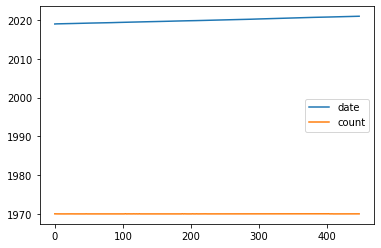

In [26]:
df2.plot()
plt.show()


In [30]:
import numpy as np
time_index = np.array(df2['date'])
data = np.array(df2['count'])
print(time_index.shape)
print(data.shape)

(448,)
(448,)


In [53]:
# Certain Hyper-parameters to tune
SPLIT_RATIO = 0.8
WINDOW_SIZE = 30
BATCH_SIZE = 32
SHUFFLE_BUFFER = 1000

In [33]:
# Dividing into train-test split
split_index = int(SPLIT_RATIO * data.shape[0])
print(split_index)


358


In [34]:
# Train-Test Split
train_data = data[:split_index]
train_time = time_index[:split_index]

test_data = data[split_index:]
test_time = time_index[split_index:]

In [35]:
def ts_data_generator(data, window_size, batch_size, shuffle_buffer):
  '''
  Utility function for time series data generation in batches
  '''
  ts_data = tf.data.Dataset.from_tensor_slices(data)
  ts_data = ts_data.window(window_size + 1, shift=1, drop_remainder=True)
  ts_data = ts_data.flat_map(lambda window: window.batch(window_size + 1))
  ts_data = ts_data.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  ts_data = ts_data.batch(batch_size).prefetch(1)
  return ts_data

In [54]:
import tensorflow as tf
train_dataset = ts_data_generator(train_data, WINDOW_SIZE, BATCH_SIZE, SHUFFLE_BUFFER)
test_dataset = ts_data_generator(test_data, WINDOW_SIZE, BATCH_SIZE, SHUFFLE_BUFFER)
test_dataset

<PrefetchDataset shapes: ((None, None), (None,)), types: (tf.int64, tf.int64)>

In [47]:
train_dataset

<PrefetchDataset shapes: ((None, None), (None,)), types: (tf.int64, tf.int64)>

In [122]:
dense_dropout = 0.4
activation_fct = "elu"
dense_window = 400
dense=200
dense_final=100

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(dense_window, input_shape=[WINDOW_SIZE], activation=activation_fct), 
    tf.keras.layers.Dropout(dense_dropout),
    tf.keras.layers.Dense(dense_window, input_shape=[WINDOW_SIZE], activation=activation_fct), 
    tf.keras.layers.Dropout(dense_dropout),
    tf.keras.layers.Dense(dense_window, input_shape=[WINDOW_SIZE], activation=activation_fct),
    tf.keras.layers.Dropout(dense_dropout),
    tf.keras.layers.Dense(dense_window, input_shape=[WINDOW_SIZE], activation=activation_fct),
    tf.keras.layers.Dropout(dense_dropout),
    tf.keras.layers.Dense(dense_window, input_shape=[WINDOW_SIZE], activation=activation_fct), 
    tf.keras.layers.Dropout(dense_dropout),
    tf.keras.layers.Dense(dense_window, input_shape=[WINDOW_SIZE], activation=activation_fct), 
    tf.keras.layers.Dropout(dense_dropout),
    tf.keras.layers.Dense(dense_window, input_shape=[WINDOW_SIZE], activation=activation_fct),
    tf.keras.layers.Dropout(dense_dropout),
    tf.keras.layers.Dense(dense_window, input_shape=[WINDOW_SIZE], activation=activation_fct),
    tf.keras.layers.Dropout(dense_dropout),
    tf.keras.layers.Dense(dense, activation=activation_fct),
    tf.keras.layers.Dense(dense, activation=activation_fct),
    tf.keras.layers.Dense(dense, activation=activation_fct),
    tf.keras.layers.Dense(dense, activation=activation_fct),
    tf.keras.layers.Dense(dense, activation=activation_fct),
    tf.keras.layers.Dense(dense, activation=activation_fct),
    tf.keras.layers.Dense(dense_final, activation=activation_fct),
    tf.keras.layers.Dense(dense_final, activation=activation_fct),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5)) # tf.keras.optimizers.SGD(lr=1e-7, momentum=0.9),)
history = model.fit(train_dataset, epochs=200,validation_data = test_dataset)

Epoch 1/200
11/11 [==============================] - 3s 98ms/step - loss: 23.4744 - val_loss: 25.7375
Epoch 2/200
11/11 [==============================] - 1s 42ms/step - loss: 20.8872 - val_loss: 22.9986
Epoch 3/200
11/11 [==============================] - 0s 40ms/step - loss: 18.9054 - val_loss: 20.7039
Epoch 4/200
11/11 [==============================] - 1s 49ms/step - loss: 16.9966 - val_loss: 18.7294
Epoch 5/200
11/11 [==============================] - 1s 48ms/step - loss: 15.2535 - val_loss: 17.0435
Epoch 6/200
11/11 [==============================] - 1s 47ms/step - loss: 13.6095 - val_loss: 15.5102
Epoch 7/200
11/11 [==============================] - 1s 46ms/step - loss: 13.0727 - val_loss: 14.2530
Epoch 8/200
11/11 [==============================] - 1s 45ms/step - loss: 11.6423 - val_loss: 13.2028
Epoch 9/200
11/11 [==============================] - 1s 42ms/step - loss: 10.6687 - val_loss: 12.3291
Epoch 10/200
11/11 [==============================] - 1s 48ms/step - loss: 10.4916

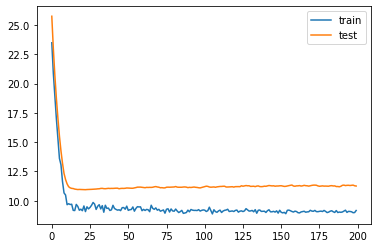

In [123]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
#plt.savefig('best.png')

2.3419826


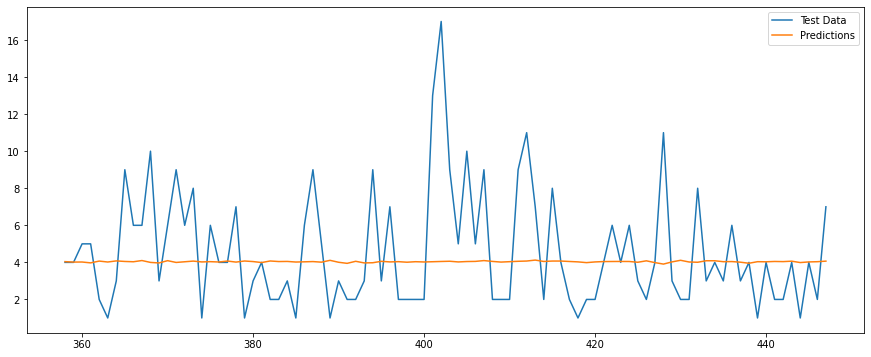

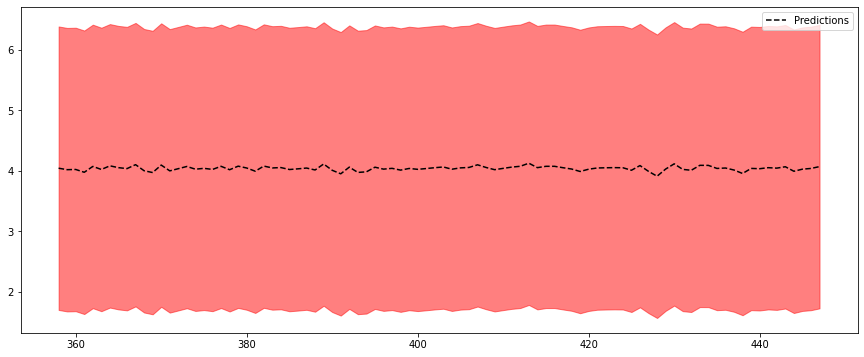

In [124]:
time_int = np.array(list(range(len(data))))
forecast=[]
for time in range(len(data) - WINDOW_SIZE):
  forecast.append(model.predict(data[time:time + WINDOW_SIZE][np.newaxis]))

forecast = forecast[split_index-WINDOW_SIZE:]
results = np.array(forecast)[:, 0, 0]
# Overall Error
error = tf.keras.metrics.mean_absolute_error(test_data, results).numpy()
print(error)
plt.figure(figsize=(15, 6))

plt.plot(list(range(split_index,len(data))), test_data, label = 'Test Data')
plt.plot(list(range(split_index,len(data))), results, label = 'Predictions')
#plt.fill_between(range(split_index,len(data)), results - error, results + error, alpha = 0.5, color = 'red')
plt.legend()
plt.show()

plt.figure(figsize=(15, 6))
# Plotting with Confidence Intervals
#plt.plot(list(range(split_index,len(data))), test_data, label = 'Test Data')
plt.plot(list(range(split_index,len(data))), results, label = 'Predictions', color = 'k', linestyle = '--')
plt.fill_between(range(split_index,len(data)), results - error, results + error, alpha = 0.5, color = 'red')
plt.legend()
plt.show()

In [2]:
import tensorflow as tf
tf.test.is_gpu_available()

2022-02-02 23:23:25.144415: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-02 23:23:25.144481: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2022-02-02 23:23:45.571911: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-02 23:23:45.572666: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-02 23:23:45.572843: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-02-02 23:23:45.572985: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-02-02 23:23:45.606746: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

False

In [4]:
tf.config.list_physical_devices('GPU')

[]

In [5]:
tf.test.is_gpu_available()

2022-02-02 23:41:32.807037: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-02 23:41:32.807625: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


False